# Modeling a climate inequality

This notebook introduces XXX,

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
def gini(x):
    """ Takes list and returns Gini coefficient """
    # By Warren Weckesser https://stackoverflow.com/a/39513799
    mad = np.abs(np.subtract.outer(x, x)).mean()  # Mean absolute difference
    if np.mean(x):
        rmad = mad / np.mean(x)  # Relative mean absolute difference
        return 0.5 * rmad      
    else:
        return 0.0
    
def redist(x, p):
    """ Redistribute values in x by percentage p in [0, 1]. """
    x = np.array(x)
    revenue = np.sum(x * p) / len(x)
    return x - x * p + revenue

In [3]:
def calc_good_life_share(emission_shares, decent_living_factor, redistribution):
    
    n_people = len(emission_shares)
    redist_emission_shares = redist(emission_shares, redistribution)
    min_share = decent_living_factor / n_people
    n_good_life = sum([res >= min_share for res in redist_emission_shares]) 
    
    return n_good_life / n_people

In [4]:
def run_simulation():
    x = np.linspace(0, 1, 10)
    emission_shares = pd.read_csv(f'data/income_shares_2016.csv')['value']
    results = []

    for decent_living_factor in np.linspace(0, 2, 10):
        for redistribution in np.linspace(0, 1, 10):
            good_life_share = calc_good_life_share(
                emission_shares = emission_shares,
                decent_living_factor = decent_living_factor,
                redistribution = redistribution
            )
            results.append([redistribution, good_life_share, decent_living_factor])

    return pd.DataFrame(results, columns=['redistribution', 'good_life_share', 'decent_living_factor'])

In [5]:
def plot_simulation(results):
    
    ax = sns.lineplot(
        data=results, 
        x='redistribution', 
        y='good_life_share', 
        hue='decent_living_factor',
        palette='RdBu',
    )

    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(0, 2))
    sm.set_array([])
    ax.get_legend().remove()
    cbar = ax.figure.colorbar(sm)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.set_label('decent_living_factor', rotation=270)

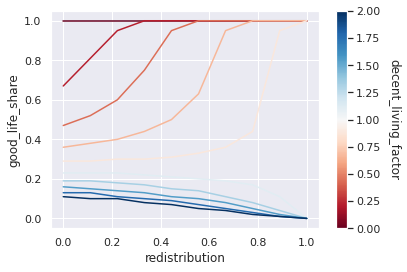

In [6]:
results = run_simulation()
plot_simulation(results)